<a href="https://colab.research.google.com/github/aaabduali/Machine-Learning/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pneumonia Disease Prediction with Tensorflow**

This notebook shows how a data from Kaggle.com is used to train a model and make predictions to detect pneumonia disease.

In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
#Download the dataset you want by replacing the text after the -d
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia



Saving kaggle.json to kaggle.json
 99% 2.27G/2.29G [00:20<00:00, 135MB/s]
100% 2.29G/2.29G [00:20<00:00, 118MB/s]


In [ ]:
import os
import zipfile

local_zip = '/content/chest-xray-pneumonia.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/chest_xray/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Directory with our training NORMAL pictures
train_normal_dir = os.path.join(train_dir, 'NORMAL')

# Directory with our training PNEUMONIA pictures
train_pneu_dir = os.path.join(train_dir, 'PNEUMONIA')

# Directory with our validation NORMAL pictures
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')

# Directory with our validation PNEUMONIA pictures
validation_pneu_dir = os.path.join(validation_dir, 'PNEUMONIA')

for x in os.listdir('/tmp/chest_xray/train'):
  print (x)

NORMAL
PNEUMONIA


In [ ]:
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_pneu_names = os.listdir(train_pneu_dir)
print(train_pneu_names[:10])

validation_normal_hames = os.listdir(validation_normal_dir)
print(validation_normal_hames[:10])

validation_pneu_names = os.listdir(validation_pneu_dir)
print(validation_pneu_names[:10])

['NORMAL2-IM-1191-0001.jpeg', 'NORMAL2-IM-1112-0001.jpeg', 'NORMAL2-IM-1049-0001.jpeg', 'NORMAL2-IM-0684-0001-0001.jpeg', 'NORMAL2-IM-0417-0001.jpeg', 'NORMAL2-IM-0799-0001.jpeg', 'IM-0547-0001.jpeg', 'NORMAL2-IM-0654-0001.jpeg', 'NORMAL2-IM-0854-0001.jpeg', 'NORMAL2-IM-0621-0001.jpeg']
['person1511_bacteria_3955.jpeg', 'person1730_bacteria_4558.jpeg', 'person889_bacteria_2813.jpeg', 'person1374_bacteria_3507.jpeg', 'person1524_virus_2658.jpeg', 'person397_bacteria_1797.jpeg', 'person1576_bacteria_4120.jpeg', 'person278_bacteria_1309.jpeg', 'person24_bacteria_109.jpeg', 'person701_bacteria_2600.jpeg']
['NORMAL2-IM-1440-0001.jpeg', 'NORMAL2-IM-1442-0001.jpeg', 'NORMAL2-IM-1437-0001.jpeg', 'NORMAL2-IM-1438-0001.jpeg', 'NORMAL2-IM-1436-0001.jpeg', 'NORMAL2-IM-1430-0001.jpeg', 'NORMAL2-IM-1431-0001.jpeg', 'NORMAL2-IM-1427-0001.jpeg']
['person1946_bacteria_4875.jpeg', 'person1949_bacteria_4880.jpeg', 'person1951_bacteria_4882.jpeg', 'person1946_bacteria_4874.jpeg', 'person1950_bacteria_4881

In [ ]:
print("Total images in the training data with normal label are: ",len(os.listdir(train_normal_dir)))
print("Total images in the training data with Pneumonia label are: ",len(os.listdir(train_pneu_dir)))
print("Total images in the Validation data with normal label are: ",len(os.listdir(validation_normal_dir)))
print("Total images in the Validation data with Pneumonia label are: ",len(os.listdir(validation_pneu_dir)))

Total images in the training data with normal label are:  1341
Total images in the training data with Pneumonia label are:  3875
Total images in the Validation data with normal label are:  8
Total images in the Validation data with Pneumonia label are:  8


In [ ]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

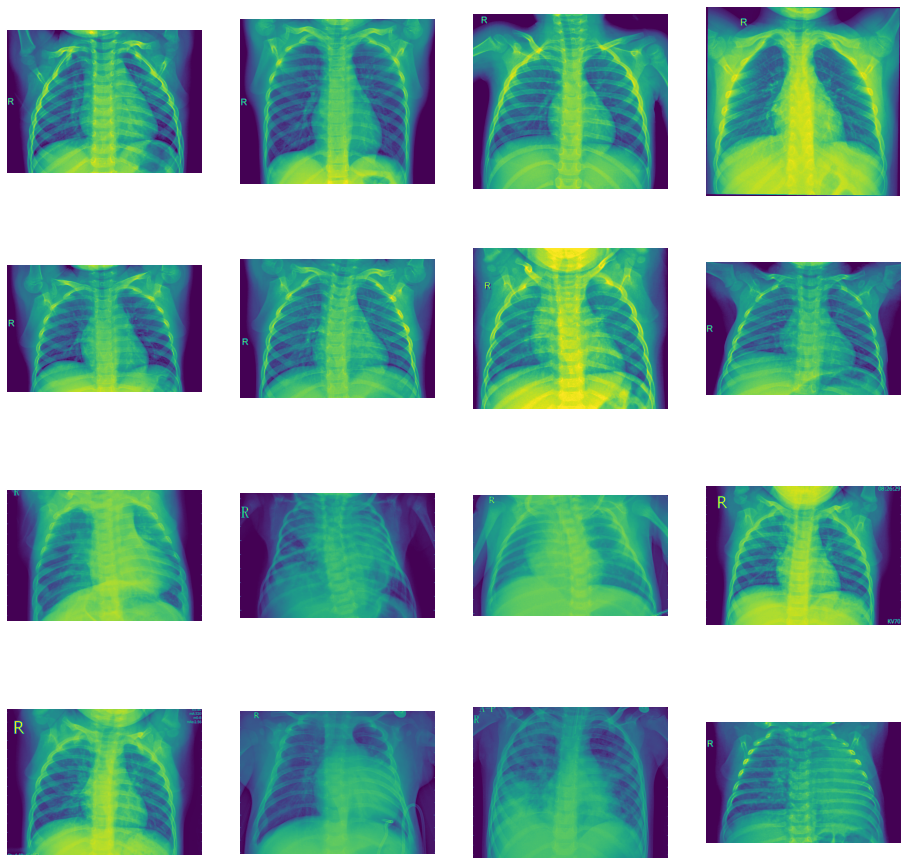

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_names[pic_index-8:pic_index]]
next_pneu_pix = [os.path.join(train_pneu_dir, fname) 
                for fname in train_pneu_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pneu_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(300, 300))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=4,
                                                         class_mode  = 'binary',
                                                         target_size = (300, 300))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=260,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=4,  # 1000 images = batch_size * steps
      verbose=1)


Epoch 1/15
260/260 [==============================] - 460s 2s/step - loss: 0.3441 - accuracy: 0.8624 - val_loss: 0.6959 - val_accuracy: 0.6875
Epoch 2/15
260/260 [==============================] - 453s 2s/step - loss: 0.1380 - accuracy: 0.9525 - val_loss: 0.5263 - val_accuracy: 0.8125
Epoch 3/15
260/260 [==============================] - 451s 2s/step - loss: 0.1146 - accuracy: 0.9590 - val_loss: 0.0744 - val_accuracy: 1.0000
Epoch 4/15
260/260 [==============================] - 454s 2s/step - loss: 0.0892 - accuracy: 0.9673 - val_loss: 0.0689 - val_accuracy: 1.0000
Epoch 5/15
260/260 [==============================] - 454s 2s/step - loss: 0.0784 - accuracy: 0.9746 - val_loss: 3.6610 - val_accuracy: 0.5000
Epoch 6/15
260/260 [==============================] - 456s 2s/step - loss: 0.0631 - accuracy: 0.9771 - val_loss: 0.4351 - val_accuracy: 0.9375
Epoch 7/15
260/260 [==============================] - 453s 2s/step - loss: 0.0597 - accuracy: 0.9823 - val_loss: 0.7198 - val_accuracy: 0.6875

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


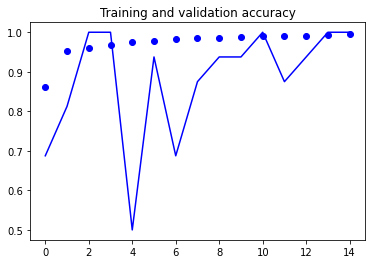

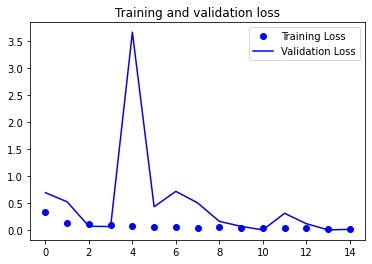

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(300, 300))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a Pneumonia ")
    
  else:
    print(fn + " is a Normal")

Saving covid-19-pneumonia-58.jpg to covid-19-pneumonia-58.jpg
[1.]
covid-19-pneumonia-58.jpg is a Pneumonia 
